# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [129]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [130]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT Data Science/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [132]:
# Check number of rows and columns
df.shape

(1898, 9)

#### Observations: There are 1,898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [133]:
# Use info() to find datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   All columns are not null.
*   4 columns are int64
*   4 columns are object
*   1 column is float64




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [134]:
# Checking missing values
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values in this dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [135]:
# Use describe to provide summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:



*   The minimum time it takes for food to be  prepared is 20 minutes.
*   The average time it takes for food to be prepared is 2.73 minutes
*   The maximum time it takes for food to be prepared is 35 minutes.



### **Question 5:** How many orders are not rated? [1 mark]

In [166]:
# check values in the rating column
df['rating'].unique()

array([5, 3, 4])

In [167]:
# Get count of Not given
(df['rating'] == 'Not given').sum()

0

#### Observations: There are 736 ratings that were not provided


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

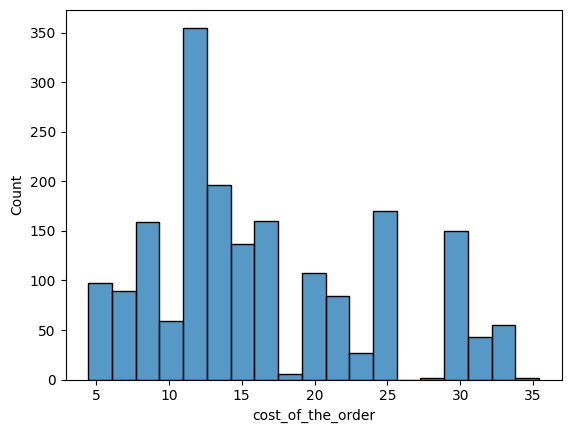

In [138]:
# Cost of order histogram
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

The most frequent cost of orders are between $12-13

Text(0.5, 0, 'Cuisine Type')

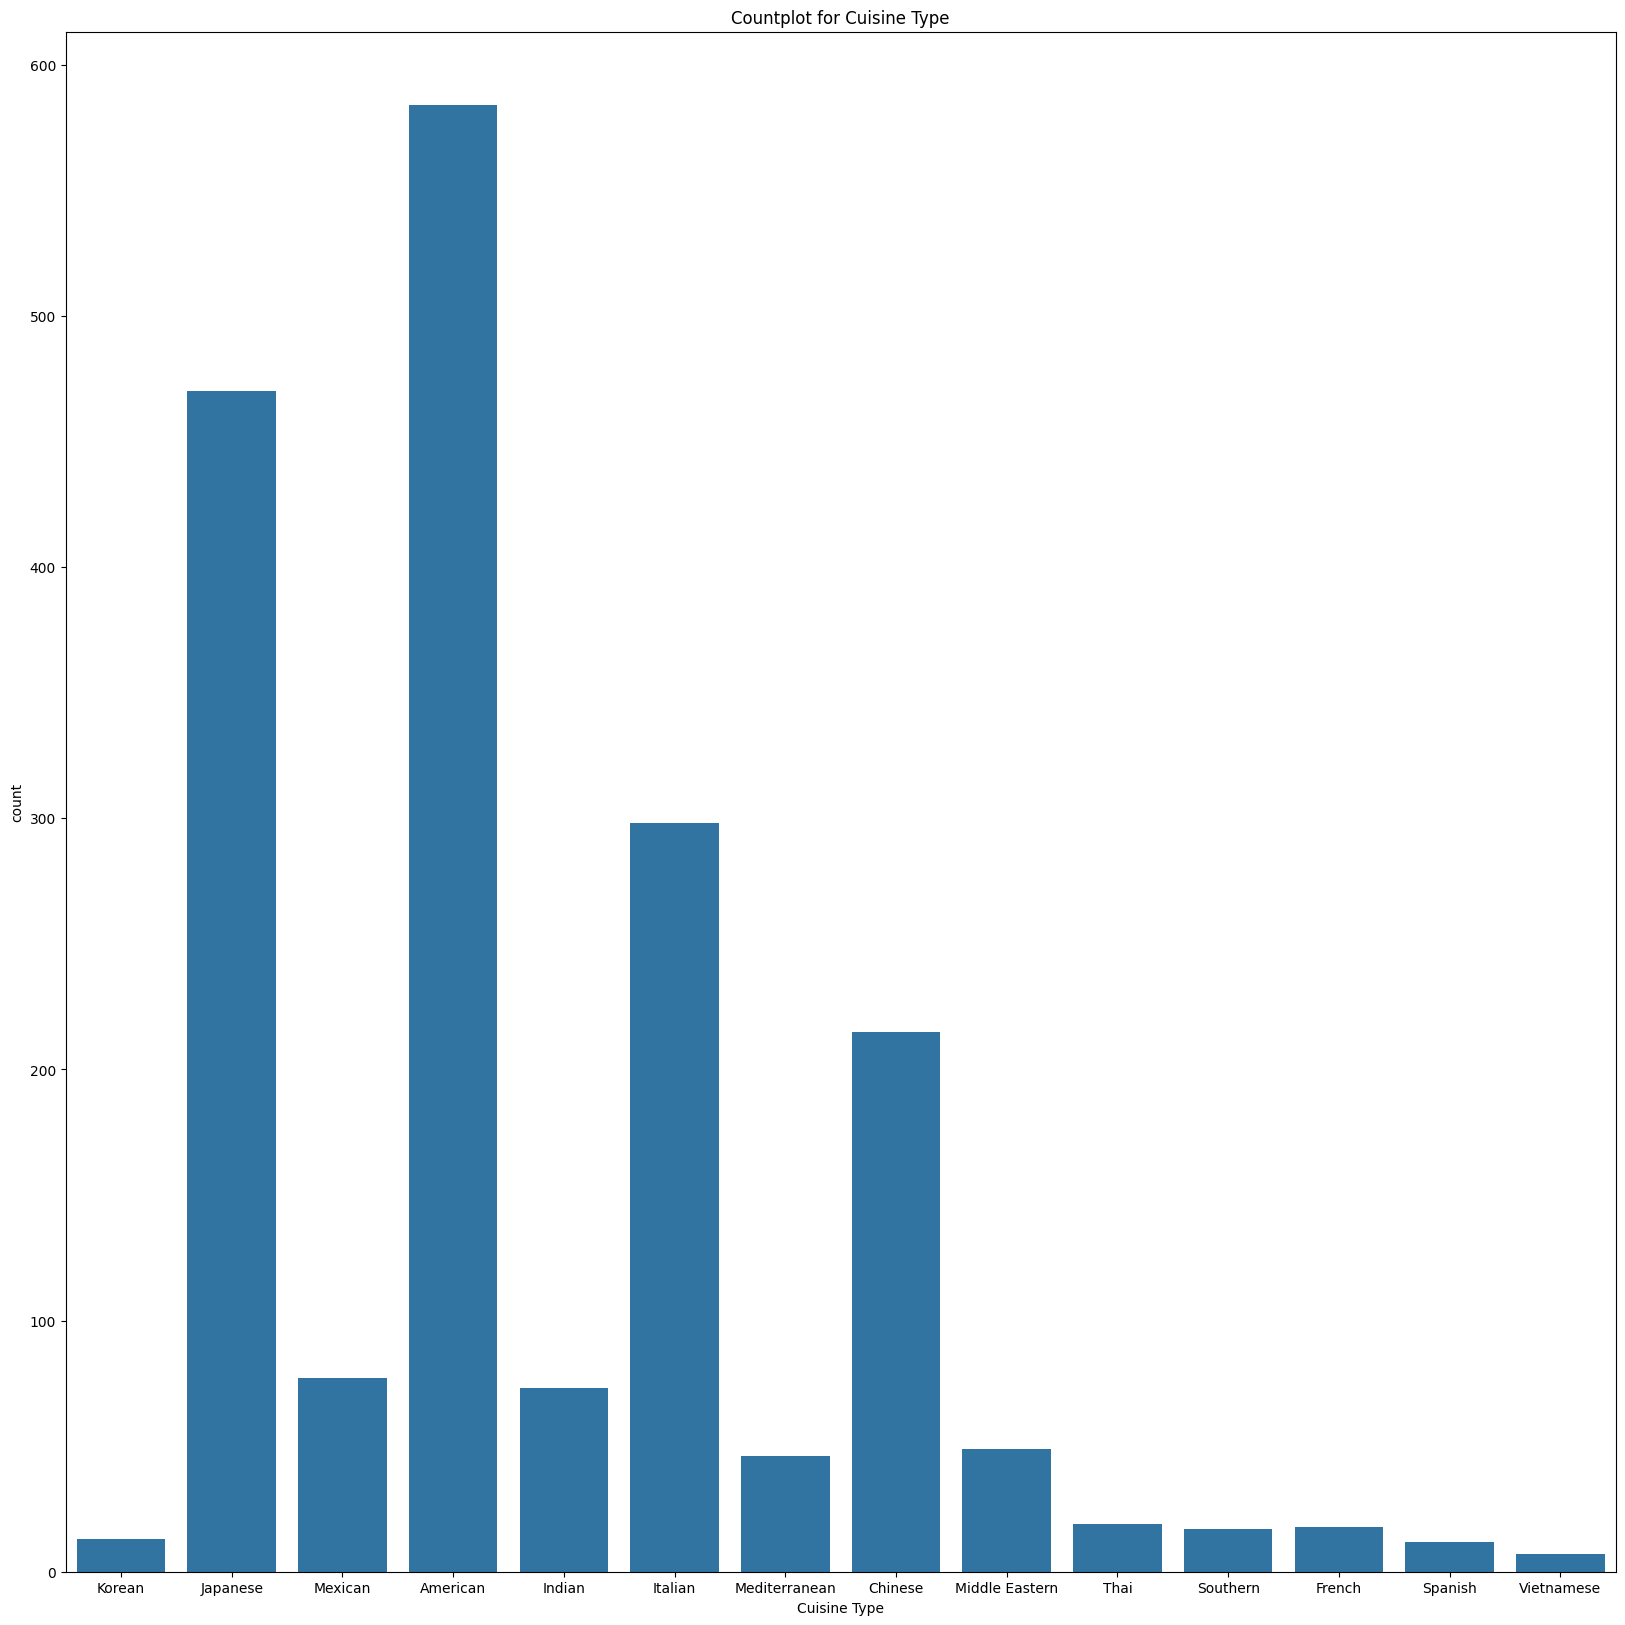

In [139]:
# countplot by cuisine type
plt.figure(figsize = (20,20))
sns.countplot(data = df, x = 'cuisine_type')
plt.title('Countplot for Cuisine Type')
plt.xlabel('Cuisine Type')

The most common cuisine types ordered are Japanese, American, Italian, and Chinese.

Text(0.5, 0, 'Day of the Week')

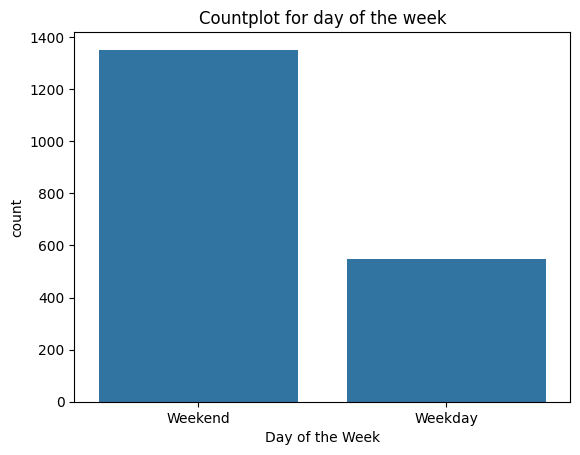

In [140]:
# Day of the week countplot
sns.countplot(data = df, x = 'day_of_the_week')
plt.title('Countplot for day of the week')
plt.xlabel('Day of the Week')

The number of orders on weekends more than doubles the number of orders on weekdays.

Text(0.5, 0, 'Rating')

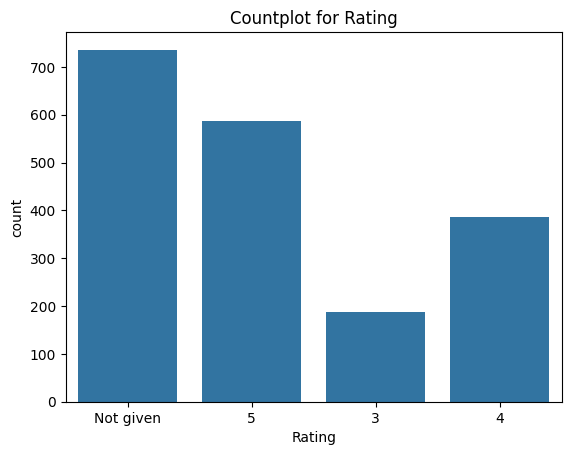

In [141]:
# Countplot for Rating
sns.countplot(data = df, x = 'rating')
plt.title('Countplot for Rating')
plt.xlabel('Rating')

There are a high number of Ratings not provided.  For Ratings given, the ranking of ratings is 5, 4, then 3.

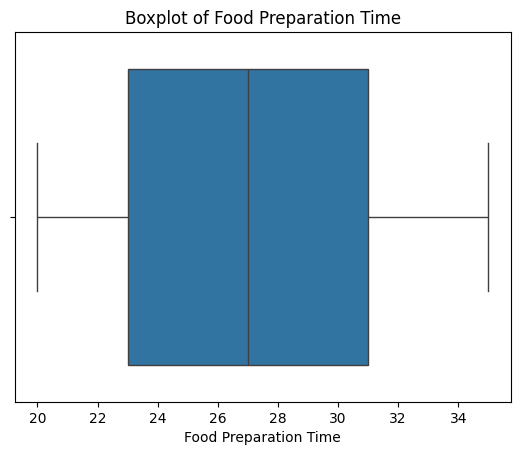

In [142]:
#boxplot for Food Prep Time
sns.boxplot(data=df,x='food_preparation_time')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.show()

The median time for food to be prepared is 27 minutes. 50% of the orders are prepared between 23 and 31 minutes.  The food preparation times are all between 20 and 35 minutes.

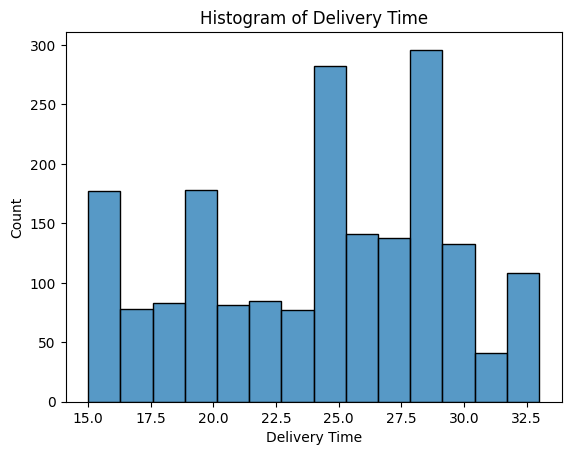

In [143]:
# histogram for Delivery Time
sns.histplot(data=df,x='delivery_time')
plt.title('Histogram of Delivery Time')
plt.xlabel('Delivery Time')
plt.show()

The most frequent delivery times are between 24 minutes and 31 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [144]:
#Count of top 5 restaurants
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:  

# The top 5 restaurants for number of orders are:

1.   Shake Shack - 219
2.   The Meatball Shop - 132
3.   Blue Ribbon Sushi - 119
4.   Blue Ribbon Fried Chicken - 96
5.   Parm - 68




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [145]:
# most popular cuisine type on weekends
dfwk = df[df['day_of_the_week'] == 'Weekend']
dfwk['cuisine_type'].value_counts().head(5)

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
# The top 5 cuisine types on weekends are:
1. American	- 415
2. Japanese	- 335
3. Italian	- 207
4. Chinese	- 163
5. Mexican	- 53

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [146]:
# Convert 'cost_of_the_order' to numeric
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')

# Find the number of orders costing > 20
order_greater_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Calculate percentage of orders costing > 20
percentage = (order_greater_20 / df.shape[0]) * 100

# Print results
print(order_greater_20)
print(round(percentage, 2), "%")

555
29.24 %


#### Observations: There are 555 orders costing more than $20.  

The percentage of orders over $20 is 29.24%.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [148]:
# calculate mean delivery time
mean_delivery_time = df['delivery_time'].mean()
print(round(mean_delivery_time,1))

24.2


#### Observations: The mean delivery time is 24.2 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [149]:
# Get the counts of each customer_id
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:The top 3 customer ID's are:
1. 52832	- 13
2. 47440	- 10
3. 83287	- 9



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


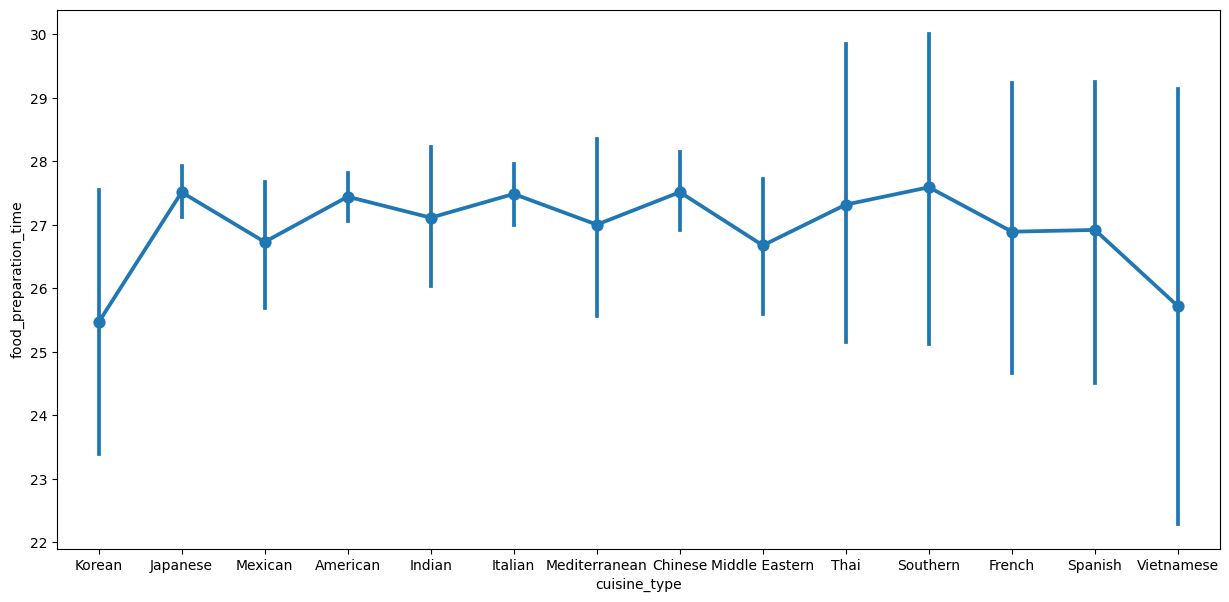

In [150]:
# Cuisine type vs food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'cuisine_type', y = 'food_preparation_time', data = df)
plt.show()

Vietnamese food has the largest food preparation time variance. American food has the smallest food preparation time variance.

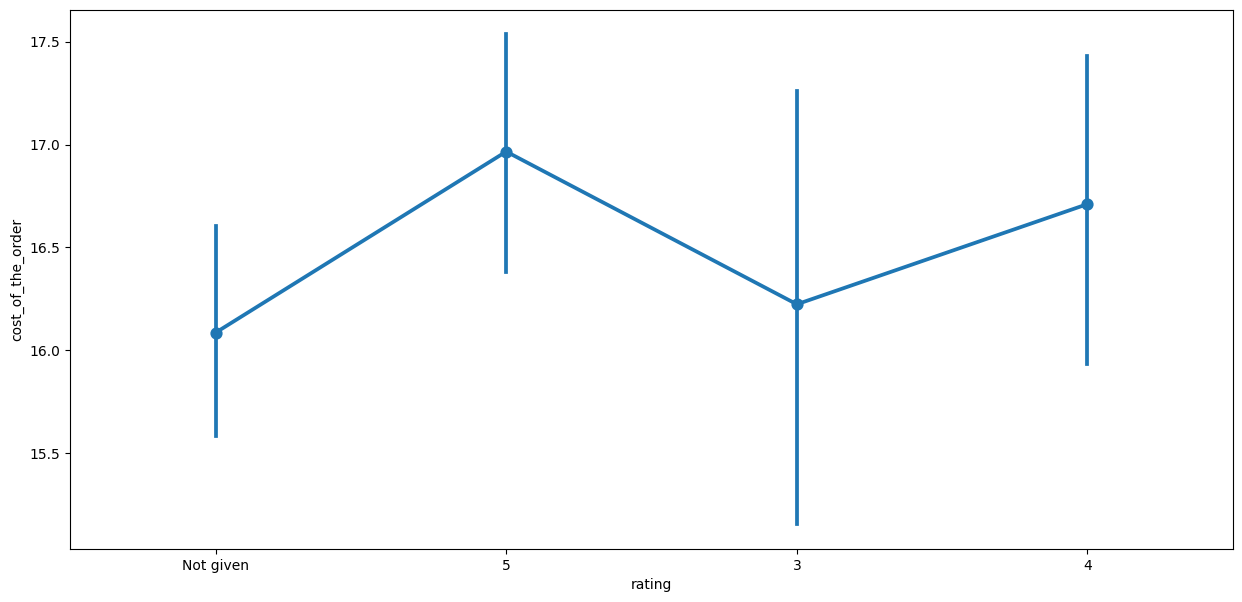

In [156]:
# Rating vs Cost of Order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

Ratings of 3 have the widest ranges of cost suggesting customers may be paying a relatively low or high cost for ratings of 3.

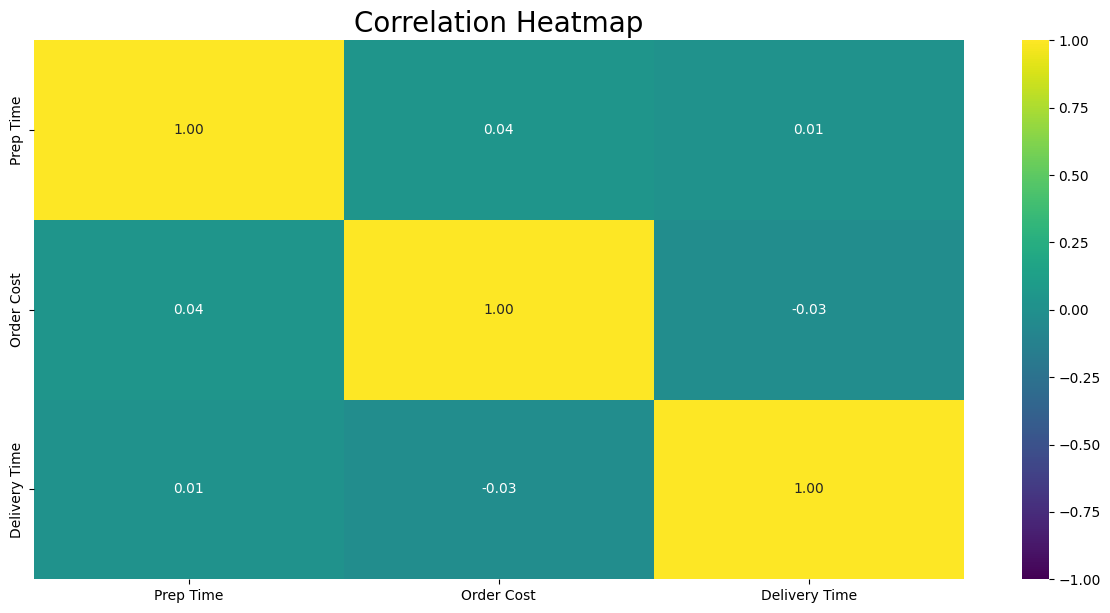

In [157]:
# Heat map
col_list = ['food_preparation_time', 'cost_of_the_order', 'delivery_time']
plt.figure(figsize=(15, 7))

sns.heatmap(
    df[col_list].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="viridis",
    xticklabels=['Prep Time', 'Order Cost', 'Delivery Time'],
    yticklabels=['Prep Time', 'Order Cost', 'Delivery Time']
)

plt.title("Correlation Heatmap", fontsize=20)
plt.show()


There is little correlation among the variables, but the strongest correlation is between the cost of the order and the prep time.

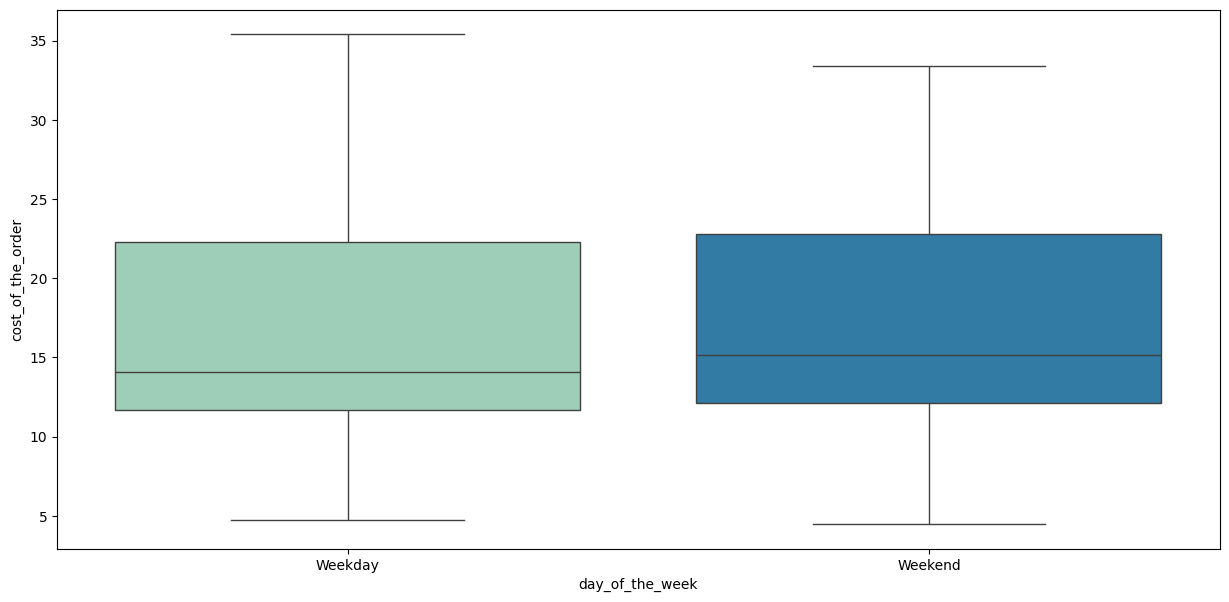

In [165]:
# Boxplot for Day of the Week vs Cost of order
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "cost_of_the_order", data = df, palette = 'YlGnBu')
plt.show()

The average cost is generally the same between weekdays and weekends. Weekdays have a little bit higher maximum than weekends.

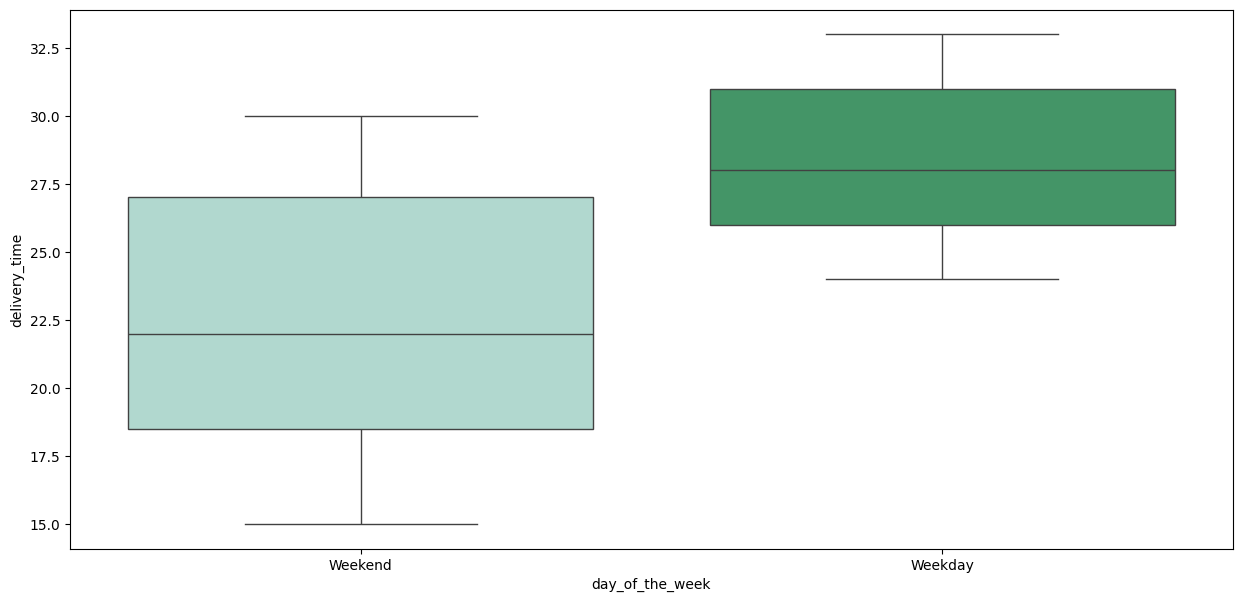

In [159]:
# Boxplot for Day of the Week vs Delivery Time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'BuGn')
plt.show()

Weekdays have a much higher delivery time than weekends.  In fact the min delivery time for weekdays is higher than the mean for weekends.

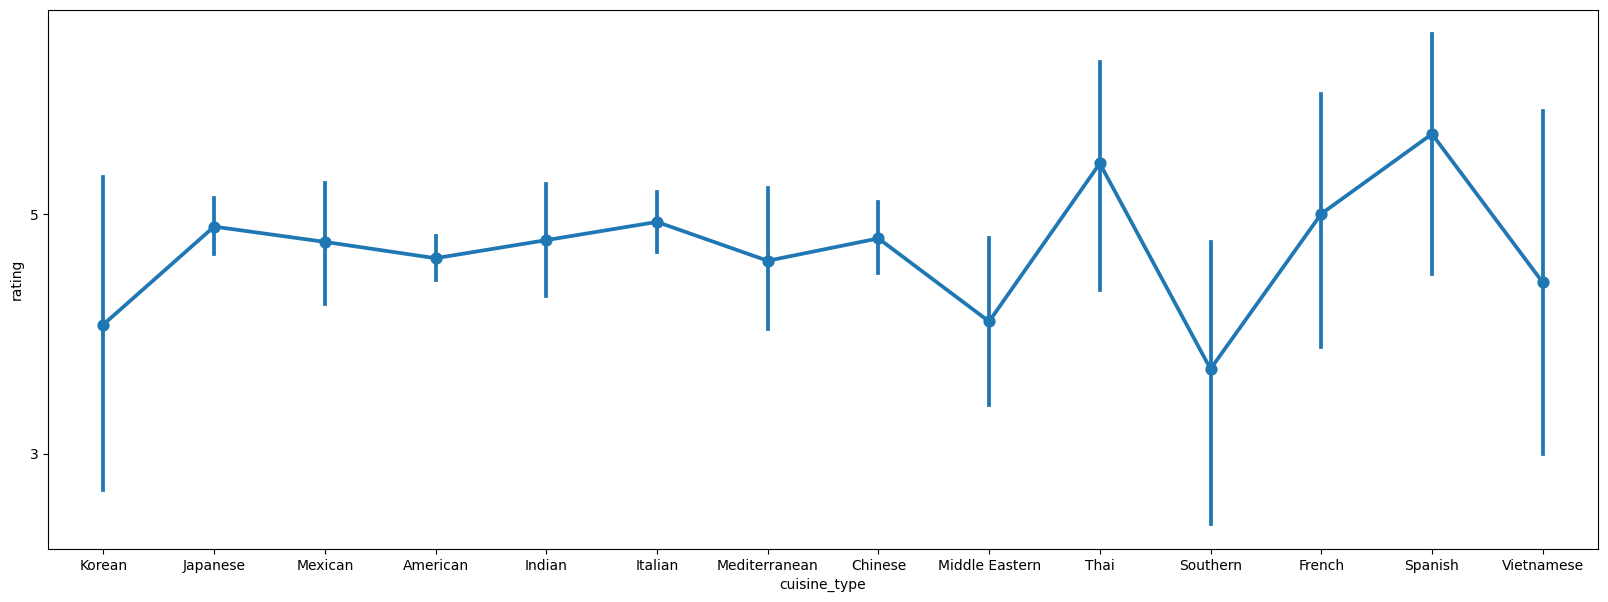

In [160]:
# Cuisine Type Vs Rating
plt.figure(figsize=(20, 7))
sns.pointplot(x = 'cuisine_type', y = 'rating', data = df)
plt.show()

Spanish cuisine type has the highest ratings, while Vietnamese cuisine type has the lowest ratings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [161]:
# Remove rows that are mrked as 'Not given'
df = df[df['rating'] != 'Not given']

# set rating to int
df['rating'] = df['rating'].astype('int')

# Get rating count and rating average
df1_rating_count = df.groupby('restaurant_name')['rating'].count()
df1_average_rating = df.groupby('restaurant_name')['rating'].mean()

# Set new dataframe
restaurant_filtered = pd.DataFrame({
    'rating_count': df1_rating_count,
    'average_rating': df1_average_rating
})

# Filter for ratings > 50 and average rating > 4
promotional_restaurants = restaurant_filtered[
    (restaurant_filtered['rating_count'] > 50) &
    (restaurant_filtered['average_rating'] > 4)
]

# Print restaurants
print(promotional_restaurants)


                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            64        4.328125
Blue Ribbon Sushi                    73        4.219178
Shake Shack                         133        4.278195
The Meatball Shop                    84        4.511905


#### Observations: There are 4 restaurants that have an average rating of greater than 4 and a total rating count above 50.  They are:
1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack
4. The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [162]:
# Get Net Revenue
def revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(revenue)

total_revenue = round(df['Revenue'].sum(),2)
print(total_revenue)

3865.57


#### Observations: The Net Revenue is $3,856.57


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [163]:
# Sum Food Prep and Delivery times
df['combined_time'] = df['food_preparation_time'] + df['delivery_time']

# Orders greater than 60 minutes
orders_greater_than_60 = df[df['combined_time'] > 60].shape[0]
all_orders = df.shape[0]

# Percentage of orders greater than 60 min
per_greater_than_60 = (orders_greater_than_60 / all_orders) * 100

# % of orders greater than 60 minutes
print(round(per_greater_than_60, 2))


10.24


#### Observations: 10.24% of orders take greater than 60 minutes for food prep and delivery time.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [164]:
# Get mean for Weekday vs Weekend using groupby
WeekdayVsWeekend = round(df.groupby('day_of_the_week')['delivery_time'].mean(),1)
difference = round(abs(WeekdayVsWeekend['Weekday'] - WeekdayVsWeekend['Weekend']), 1)

print(WeekdayVsWeekend)
print(f"Difference in average time is: {difference} minutes")


day_of_the_week
Weekday    28.3
Weekend    22.4
Name: delivery_time, dtype: float64
Difference in average time is: 5.9 minutes


#### Observations: Weekdays have a 5.9 minute average higher delivery time than Weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The cuisine type of Vietnamese has the lowest overall ratings, but also the highest min/max variance. Spanish cuisine type has the highest overall ratings.  

* Other Cuisine types of Thai, Indian, and Mexican have relatively high ratings, with small variances from min to max ratings.  

### Recommendations:

*  Restaurants should do further analysis of what Vietnamese dishes have the highest ratings and what have the lowest ratings.  Restaurants should remove the lower rating Vietnamese dishes from the menu and incorporate more Spanish dishes to the menu.

* Incorporating more Thai, Indian, and Mexican cuisine types would help achieve higher overall order ratings for restaurants.

---